In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from datetime import timedelta

In [42]:
position_path = "./Data/"
data_path = "./Data/RealRun/"
output_path ="./"



'''Create single CR6 dataframe with datetime for comparisons'''
dict={}
for i in tqdm(range(5462,13774)): #create dataframe of all CR6 data
    try:
        outputsize = len(dict)

        df_CR6 = pd.read_table(data_path+"Younng10Hz"+str(i)+".dat",
                           sep=",",
                          skiprows=[0,2,3])

        for j in range(len(df_CR6)):
            if "." in df_CR6['TIMESTAMP'][j]:
                date = datetime.strptime(df_CR6['TIMESTAMP'][j], '%Y-%m-%d %H:%M:%S.%f')
                #print(date)
            else:
                date = datetime.strptime(df_CR6['TIMESTAMP'][j], '%Y-%m-%d %H:%M:%S')

            #dict[outputsize+j]={"Year":date.year,"Month":date.month,"Day":date.day,"Hour":date.hour,"Minute":date.minute,"Second":date.second+date.microsecond/1000000.,"Record":df_CR6['RECORD'][j],"U (m s^-1)":df_CR6['U'][j],"V (m s^-1)":df_CR6['V'][j],"W (m s^-1)":df_CR6['W'][j],"TSonic (K)":df_CR6['TSonic'][j],"RH (%)":df_CR6['RH'][j],"T_HMP60 (C)":df_CR6['T_HMP60'][j]}
            dict[outputsize+j]={"TIMESTAMP":date,"Record":df_CR6['RECORD'][j],"U (m s^-1)":df_CR6['U'][j],"V (m s^-1)":df_CR6['V'][j],"W (m s^-1)":df_CR6['W'][j],"TSonic (K)":df_CR6['TSonic'][j],"RH (%)":df_CR6['RH'][j],"T_HMP60 (C)":df_CR6['T_HMP60'][j]}    

            #output.loc[outputsize+j,output.columns]=[date.year,date.month,date.day,date.hour,date.minute,date.second+date.microsecond,df_CR6['RECORD'][j],df_CR6['U'][j],df_CR6['V'][j],df_CR6['W'][j],df_CR6['TSonic'][j],df_CR6['RH'][j],df_CR6['T_HMP60'][j]]
            #output = output.append(pd.Series([date.year,date.month,date.day,date.hour,date.minute,date.second+date.microsecond/1000000.,df_CR6['RECORD'][j],df_CR6['U'][j],df_CR6['V'][j],df_CR6['W'][j],df_CR6['TSonic'][j],df_CR6['RH'][j],df_CR6['T_HMP60'][j]], index=output.columns ), ignore_index=True)
    
    except: #if the file is missing just skip it
        pass
        
df_CR6 = pd.DataFrame.from_dict(dict, "index")




100%|██████████████████████████████████████████████████████████████████████████████| 8312/8312 [02:07<00:00, 64.99it/s]


In [43]:
'''START LOOP HERE!!!'''
inputFiles = ['2020-10-02 16-00.xlsx','2020-10-02 16-30.xlsx','2020-10-02 17-00.xlsx','2020-10-02 17-31.xlsx','2020-10-02 18-00.xlsx','2020-10-02 18-30.xlsx','2020-10-02 19-00.xlsx','2020-10-02 19-30.xlsx',
             '2020-10-02 20-00.xlsx','2020-10-02 20-30.xlsx','2020-10-02 21-00.xlsx','2020-10-02 21-30.xlsx','2020-10-02 22-00.xlsx','2020-10-02 22-30.xlsx','2020-10-02 23-00.xlsx','2020-10-02 23-30.xlsx',
             '2020-10-03 00-00.xlsx','2020-10-03 00-30.xlsx','2020-10-03 01-00.xlsx','2020-10-03 01-30.xlsx','2020-10-03 02-00.xlsx','2020-10-03 02-30.xlsx','2020-10-03 03-00.xlsx','2020-10-03 03-30.xlsx',
             '2020-10-03 04-00.xlsx','2020-10-03 04-30.xlsx','2020-10-03 05-00.xlsx','2020-10-03 05-30.xlsx','2020-10-03 06-00.xlsx','2020-10-03 06-30.xlsx', '2020-10-03 07-00.xlsx','2020-10-03 07-30.xlsx',
             '2020-10-08 08-00.xlsx','2020-10-08 08-30.xlsx','2020-10-08 09-00.xlsx','2020-10-08 09-30.xlsx','2020-10-08 10-00.xlsx','2020-10-08 10-30.xlsx','2020-10-08 11-00.xlsx','2020-10-08 11-30.xlsx',
             '2020-10-08 12-00.xlsx','2020-10-08 12-30.xlsx','2020-10-08 13-00.xlsx','2020-10-08 13-30.xlsx','2020-10-08 14-00.xlsx','2020-10-08 14-30.xlsx','2020-10-08 15-00.xlsx','2020-10-02 15-30.xlsx']

''''2020-10-02 16-00.xlsx','2020-10-02 16-30.xlsx','2020-10-02 17-00.xlsx','2020-10-02 17-31.xlsx','2020-10-02 18-00.xlsx','2020-10-02 18-30.xlsx','2020-10-02 19-00.xlsx','2020-10-02 19-30.xlsx',
             '2020-10-02 20-00.xlsx','2020-10-02 20-30.xlsx','2020-10-02 21-00.xlsx','2020-10-02 21-30.xlsx','2020-10-02 22-00.xlsx','2020-10-02 22-30.xlsx','2020-10-02 23-00.xlsx','2020-10-02 23-30.xlsx',
             '2020-10-03 00-00.xlsx','2020-10-03 00-30.xlsx','2020-10-03 01-00.xlsx','2020-10-03 01-30.xlsx','2020-10-03 02-00.xlsx','2020-10-03 02-30.xlsx','''


outputFiles = ['16-00','16-30','17-00','17-30','18-00','18-30','19-00','19-30',
               '20-00','20-30','21-00','21-30','22-00','22-30','23-00','23-30',
              '00-00','00-30','01-00','01-30','02-00','02-30','03-00','03-30',
              '04-00','04-30','05-00','05-30','06-00','06-30','07-00','07-30',
              '08-00','08-30','09-00','09-30','10-00','10-30','11-00','11-30',
              '12-00','12-30','13-00','13-30','14-00','14-30','15-00','15-30']

''''16-00','16-30','17-00','17-30','18-00','18-30','19-00','19-30',
               '20-00','20-30','21-00','21-30','22-00','22-30','23-00','23-30',
              '00-00','00-30','01-00','01-30','02-00','02-30','''

for j in tqdm(range(len(inputFiles))):
    df_pos = pd.read_excel(position_path+inputFiles[j], header=None)
    df_pos.columns = ['TIMESTAMP', 'X', 'Y', 'THETA']

    '''Create proper timestamps for position'''
    dict ={}
    for i in tqdm(range(len(df_pos))):
        dict[i]={'TIMESTAMP': datetime.fromordinal(int(df_pos['TIMESTAMP'][i])) + timedelta(days=df_pos['TIMESTAMP'][i]%1) - timedelta(days = 366),'X':df_pos['X'][i],'Y':df_pos['Y'][i],'THETA':df_pos['THETA'][i]}
    df_pos = pd.DataFrame.from_dict(dict, "index")



    '''Trim CR6 data based on timestamps from position data. Use new dataframe.'''
    #df_CR6_trim=df_CR6
    
    df_CR6_trim= df_CR6.iloc[df_CR6.index[(df_CR6['TIMESTAMP'] == df_pos['TIMESTAMP'].iloc[0].round('100ms'))].tolist()[0]:
                         df_CR6.index[(df_CR6['TIMESTAMP'] == df_pos['TIMESTAMP'].iloc[-1].round('100ms'))].tolist()[0]]

    '''for i in tqdm(range((df_CR6_trim['TIMESTAMP']-df_pos['TIMESTAMP'].iloc[-1]).abs().argsort()[:2].iloc[1],len(df_CR6))):
        df_CR6_trim.drop(i, inplace=True)

    for i in tqdm(range(0,(df_CR6_trim['TIMESTAMP']-df_pos['TIMESTAMP'].iloc[0]).abs().argsort()[:2].iloc[0])):
        df_CR6_trim.drop(i, inplace=True)'''

    df_CR6_trim.reset_index(inplace=True, drop=True)


    '''Create a combined database'''
    dict={}
    for i in tqdm(range(len(df_CR6_trim))):
        date = df_CR6_trim["TIMESTAMP"].iloc[i]
        index = (df_pos['TIMESTAMP']-date).abs().argsort()[:2].iloc[1]

        x = df_pos['X'].iloc[index]
        y = df_pos['Y'].iloc[index]
        theta = df_pos['THETA'].iloc[index]

        dict[i]= {"Year":date.year,"Month":date.month,"Day":date.day,"Hour":date.hour,
                  "Minute":date.minute,"Second":date.second+date.microsecond/1000000.,
                  "x":x,"y":y,"theta":theta,
                  "Record":df_CR6_trim['Record'][i],"U (m s^-1)":df_CR6_trim['U (m s^-1)'][i],"V (m s^-1)":df_CR6_trim['V (m s^-1)'][i],
                  "W (m s^-1)":df_CR6_trim['W (m s^-1)'][i],"TSonic (K)":df_CR6_trim['TSonic (K)'][i],"RH (%)":df_CR6_trim['RH (%)'][i],
                  "T_HMP60 (C)":df_CR6_trim['T_HMP60 (C)'][i]}


    df_comb = pd.DataFrame.from_dict(dict, "index")


    '''Create MultiIndex based on each point'''
    point_dict={'p1':[2.8,0.7,0], 'p2':[6.0,0.7,0], 'p3':[6.0,4.4,0], 'p4':[2.8,4.4,0],
               'p5':[6.0,7.9,0], 'p6':[2.8,7.9,0], 'p7':[6.0,10.6,0], 'p8':[4.9,11.8,0]}

    drop=50 #frequency*seconds to drop, make sure the robot is in the correct positon

    dict={'p1':{},'p2':{},'p3':{},'p4':{},'p5':{},'p6':{},'p7':{},'p8':{}}

    for i in tqdm(range(drop, len(df_comb))):
        if ([df_comb['x'].iloc[i-drop],df_comb['y'].iloc[i-drop],df_comb['theta'].iloc[i-drop]] and
           [df_comb['x'].iloc[i],df_comb['y'].iloc[i],df_comb['theta'].iloc[i]]) in point_dict.values(): #Check that it has been there for a while

            point = list(point_dict.keys())[list(point_dict.values()).index([df_comb['x'].iloc[i],df_comb['y'].iloc[i],df_comb['theta'].iloc[i]])] #get the point

            dict[point][i]=df_comb.iloc[i].to_dict()


    dict_of_df = {k: pd.DataFrame(v) for k,v in dict.items()}
    output = pd.concat(dict_of_df, axis=1).transpose()
    output.to_csv('./Data/Binned Data/'+outputFiles[j]+'.csv',index=True)


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16605.34it/s]

  9%|██████▋                                                                     | 1247/14195 [00:02<00:23, 542.19it/s]


 29%|██████████████████████                                                      | 4124/14195 [00:09<00:27, 367.48it/s]


 44%|█████████████████████████████████▎                                          | 6219/14195 [00:15<00:29, 270.81it/s]


 56%|██████████████████████████████████████████▉                                 | 8016/14195 [00:22<00:22, 274.67it/s]


 71%|█████████████████████████████████████████████████████▍                     | 10111/14195 [00:29<00:12, 330.25it/s]


 88%|██████████████████████████████████████████████████████████████████▎        | 12541/14195 [00:36<00:04, 399.99it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14195/14195 [00:40<00:00, 354.82it/s]

  9%|██████▉                                                                   | 6602/70828 [00:00<00:03, 16351.27it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15773.91it/s]

 10%|███████▉                                                                    | 1475/14224 [00:02<00:24, 514.55it/s]


 30%|██████████████████████▋                                                     | 4240/14224 [00:09<00:27, 367.29it/s]


 44%|█████████████████████████████████▍                                          | 6264/14224 [00:16<00:31, 250.61it/s]


 56%|██████████████████████████████████████████▌                                 | 7969/14224 [00:23<00:23, 267.46it/s]


 71%|█████████████████████████████████████████████████████                      | 10057/14224 [00:30<00:13, 318.92it/s]


 89%|██████████████████████████████████████████████████████████████████▍        | 12597/14224 [00:36<00:03, 411.65it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14224/14224 [00:40<00:00, 352.63it/s]

 14%|██████████▏                                                               | 9731/70828 [00:00<00:03, 16236.07it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16453.76it/s]

 12%|████████▉                                                                   | 1681/14390 [00:02<00:25, 503.08it/s]


 31%|███████████████████████▍                                                    | 4448/14390 [00:09<00:30, 325.24it/s]


 45%|█████████████████████████████████▉                                          | 6431/14390 [00:16<00:29, 267.89it/s]


 57%|███████████████████████████████████████████▌                                | 8256/14390 [00:23<00:21, 292.08it/s]


 73%|██████████████████████████████████████████████████████▍                    | 10440/14390 [00:30<00:11, 341.52it/s]


 90%|███████████████████████████████████████████████████████████████████▊       | 13012/14390 [00:37<00:03, 402.83it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14390/14390 [00:40<00:00, 359.55it/s]

 26%|██████████████████▋                                                      | 18103/70828 [00:01<00:03, 16468.26it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16437.74it/s]

 13%|██████████                                                                  | 1902/14397 [00:03<00:26, 477.07it/s]


 32%|████████████████████████▍                                                   | 4626/14397 [00:10<00:29, 330.57it/s]


 46%|██████████████████████████████████▊                                         | 6599/14397 [00:17<00:30, 254.44it/s]


 59%|████████████████████████████████████████████▌                               | 8430/14397 [00:24<00:21, 276.66it/s]


 73%|██████████████████████████████████████████████████████▉                    | 10553/14397 [00:30<00:10, 349.50it/s]


 91%|████████████████████████████████████████████████████████████████████▎      | 13117/14397 [00:37<00:03, 423.04it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14397/14397 [00:40<00:00, 356.22it/s]

 30%|█████████████████████▉                                                   | 21227/70828 [00:01<00:03, 16263.27it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16253.14it/s]

 14%|██████████▊                                                                 | 2014/14094 [00:03<00:25, 466.81it/s]


 33%|█████████████████████████                                                   | 4656/14094 [00:10<00:27, 345.31it/s]


 47%|███████████████████████████████████▌                                        | 6589/14094 [00:17<00:29, 250.60it/s]


 60%|█████████████████████████████████████████████▎                              | 8411/14094 [00:24<00:18, 303.03it/s]


 75%|████████████████████████████████████████████████████████▍                  | 10612/14094 [00:31<00:10, 331.00it/s]


 94%|██████████████████████████████████████████████████████████████████████▋    | 13287/14094 [00:37<00:01, 463.74it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14094/14094 [00:39<00:00, 357.08it/s]

 56%|████████████████████████████████████████▊                                | 39599/70828 [00:02<00:01, 16556.00it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16307.47it/s]

 18%|█████████████▎                                                              | 2530/14410 [00:04<00:27, 436.59it/s]


 35%|██████████████████████████▌                                                 | 5029/14410 [00:11<00:29, 315.50it/s]


 49%|████████████████████████████████████▉                                       | 7003/14410 [00:18<00:25, 290.77it/s]


 62%|███████████████████████████████████████████████▎                            | 8971/14410 [00:25<00:17, 316.77it/s]


 78%|██████████████████████████████████████████████████████████▌                | 11258/14410 [00:32<00:09, 347.23it/s]


 97%|█████████████████████████████████████████████████████████████████████████  | 14047/14410 [00:38<00:00, 479.39it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14410/14410 [00:39<00:00, 364.30it/s]

 75%|██████████████████████████████████████████████████████▊                  | 53161/70828 [00:03<00:01, 13971.03it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15283.34it/s]

 19%|██████████████▊                                                             | 2789/14355 [00:05<00:28, 409.45it/s]


 35%|██████████████████████████▍                                                 | 4989/14355 [00:12<00:36, 259.76it/s]


 47%|███████████████████████████████████▌                                        | 6719/14355 [00:19<00:30, 254.18it/s]


 60%|█████████████████████████████████████████████▌                              | 8616/14355 [00:26<00:18, 316.48it/s]


 77%|█████████████████████████████████████████████████████████▋                 | 11047/14355 [00:33<00:08, 394.03it/s]


 97%|████████████████████████████████████████████████████████████████████████▊  | 13930/14355 [00:39<00:00, 485.46it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14355/14355 [00:40<00:00, 351.83it/s]

 74%|█████████████████████████████████████████████████████▊                   | 52252/70828 [00:03<00:01, 16206.71it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16030.92it/s]

 20%|███████████████▎                                                            | 2918/14485 [00:05<00:26, 431.56it/s]


 37%|████████████████████████████▍                                               | 5416/14485 [00:12<00:30, 296.00it/s]


 50%|██████████████████████████████████████▏                                     | 7272/14485 [00:19<00:27, 262.54it/s]


 64%|████████████████████████████████████████████████▉                           | 9327/14485 [00:26<00:15, 324.46it/s]


 80%|████████████████████████████████████████████████████████████▎              | 11650/14485 [00:32<00:08, 353.86it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14485/14485 [00:39<00:00, 368.57it/s]

  9%|██████▌                                                                    | 1275/14435 [00:00<00:02, 6577.92it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16195.42it/s]

  0%|                                                                                        | 0/14461 [00:00<?, ?it/s]


 24%|█████████████████▉                                                          | 3403/14461 [00:06<00:27, 396.87it/s]


 39%|█████████████████████████████▊                                              | 5670/14461 [00:13<00:31, 278.26it/s]


 51%|██████████████████████████████████████▋                                     | 7370/14461 [00:20<00:28, 249.56it/s]


 65%|█████████████████████████████████████████████████▏                          | 9371/14461 [00:27<00:15, 323.04it/s]


 81%|████████████████████████████████████████████████████████████▋              | 11697/14461 [00:34<00:07, 369.17it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14461/14461 [00:40<00:00, 358.92it/s]

 17%|█████████████                                                              | 2521/14411 [00:00<00:01, 6358.67it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15578.88it/s]

  0%|                                                                                        | 0/14356 [00:00<?, ?it/s]


 23%|█████████████████▎                                                          | 3270/14356 [00:06<00:28, 394.65it/s]


 39%|█████████████████████████████▋                                              | 5603/14356 [00:13<00:27, 315.80it/s]


 52%|███████████████████████████████████████▋                                    | 7497/14356 [00:20<00:26, 263.50it/s]


 65%|█████████████████████████████████████████████████▌                          | 9357/14356 [00:27<00:16, 298.40it/s]


 80%|███████████████████████████████████████████████████████████▊               | 11453/14356 [00:34<00:08, 345.14it/s]


 99%|██████████████████████████████████████████████████████████████████████████▌| 14262/14356 [00:40<00:00, 495.80it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14356/14356 [00:41<00:00, 349.37it/s]

 92%|███████████████████████████████████████████████████████████████████▍     | 65463/70828 [00:03<00:00, 16449.91it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16588.05it/s]

 22%|████████████████▉                                                           | 3211/14393 [00:06<00:27, 412.64it/s]


 40%|██████████████████████████████                                              | 5703/14393 [00:13<00:26, 329.29it/s]


 54%|████████████████████████████████████████▉                                   | 7753/14393 [00:20<00:21, 305.59it/s]


 69%|████████████████████████████████████████████████████                        | 9862/14393 [00:26<00:14, 319.64it/s]


 85%|███████████████████████████████████████████████████████████████▌           | 12191/14393 [00:33<00:05, 399.27it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14393/14393 [00:38<00:00, 373.10it/s]

 67%|██████████████████████████████████████████████████▏                        | 9595/14343 [00:01<00:00, 5836.70it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16320.57it/s]

  6%|████▌                                                                        | 860/14373 [00:01<00:23, 580.15it/s]


 27%|████████████████████▌                                                       | 3887/14373 [00:08<00:27, 386.39it/s]


 42%|███████████████████████████████▋                                            | 5985/14373 [00:15<00:30, 275.96it/s]


 53%|████████████████████████████████████████▋                                   | 7689/14373 [00:21<00:24, 276.40it/s]


 68%|███████████████████████████████████████████████████▍                        | 9736/14373 [00:28<00:13, 336.09it/s]


 85%|███████████████████████████████████████████████████████████████▍           | 12166/14373 [00:35<00:05, 399.97it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14373/14373 [00:40<00:00, 355.61it/s]

 77%|████████████████████████████████████████████████████████▋                 | 10967/14323 [00:01<00:00, 6085.72it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15807.40it/s]

  6%|████▊                                                                        | 911/14402 [00:01<00:23, 568.17it/s]


 28%|████████████████████▉                                                       | 3965/14402 [00:08<00:26, 389.49it/s]


 43%|████████████████████████████████▌                                           | 6161/14402 [00:15<00:29, 279.40it/s]


 55%|██████████████████████████████████████████                                  | 7959/14402 [00:22<00:21, 297.78it/s]


 71%|█████████████████████████████████████████████████████                      | 10191/14402 [00:28<00:11, 366.10it/s]


 89%|██████████████████████████████████████████████████████████████████▉        | 12848/14402 [00:35<00:03, 407.94it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14402/14402 [00:39<00:00, 368.98it/s]

 18%|█████████████▎                                                           | 12924/70828 [00:00<00:03, 16230.12it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15984.11it/s]

 12%|█████████▍                                                                  | 1773/14371 [00:03<00:23, 530.91it/s]


 32%|████████████████████████▌                                                   | 4652/14371 [00:09<00:26, 362.01it/s]


 47%|███████████████████████████████████▌                                        | 6724/14371 [00:16<00:31, 244.66it/s]


 59%|████████████████████████████████████████████▊                               | 8484/14371 [00:23<00:21, 273.16it/s]


 73%|███████████████████████████████████████████████████████                    | 10559/14371 [00:30<00:11, 324.00it/s]


 91%|████████████████████████████████████████████████████████████████████▎      | 13078/14371 [00:37<00:03, 417.81it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14371/14371 [00:40<00:00, 356.18it/s]

 32%|███████████████████████▋                                                 | 23010/70828 [00:01<00:02, 16604.01it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16405.04it/s]

 13%|██████████▏                                                                 | 1932/14358 [00:03<00:31, 396.72it/s]


 31%|███████████████████████▊                                                    | 4508/14358 [00:10<00:29, 330.62it/s]


 45%|██████████████████████████████████                                          | 6445/14358 [00:17<00:30, 256.61it/s]


 57%|███████████████████████████████████████████▎                                | 8188/14358 [00:24<00:23, 260.29it/s]


 71%|█████████████████████████████████████████████████████▍                     | 10237/14358 [00:31<00:12, 323.94it/s]


 88%|██████████████████████████████████████████████████████████████████▎        | 12705/14358 [00:38<00:04, 386.07it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14358/14358 [00:41<00:00, 344.49it/s]

  9%|██████▊                                                                   | 6518/70828 [00:00<00:03, 16190.62it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16612.75it/s]

 11%|████████▎                                                                   | 1569/14369 [00:02<00:25, 499.50it/s]


 30%|███████████████████████                                                     | 4366/14369 [00:09<00:29, 333.53it/s]


 44%|█████████████████████████████████▍                                          | 6326/14369 [00:16<00:31, 253.73it/s]


 56%|██████████████████████████████████████████▋                                 | 8062/14369 [00:23<00:22, 281.78it/s]


 71%|█████████████████████████████████████████████████████▌                     | 10253/14369 [00:30<00:11, 354.78it/s]


 90%|███████████████████████████████████████████████████████████████████▎       | 12894/14369 [00:36<00:03, 398.71it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14369/14369 [00:40<00:00, 359.07it/s]

 21%|███████████████▌                                                         | 15154/70828 [00:00<00:03, 16698.97it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16446.78it/s]

 13%|█████████▋                                                                  | 1839/14364 [00:03<00:25, 496.00it/s]


 32%|████████████████████████▏                                                   | 4563/14364 [00:10<00:28, 338.80it/s]


 45%|██████████████████████████████████▎                                         | 6475/14364 [00:17<00:34, 229.06it/s]


 57%|███████████████████████████████████████████                                 | 8147/14364 [00:23<00:22, 272.32it/s]


 71%|█████████████████████████████████████████████████████▍                     | 10244/14364 [00:30<00:12, 335.39it/s]


 89%|██████████████████████████████████████████████████████████████████▋        | 12782/14364 [00:37<00:03, 395.77it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14364/14364 [00:40<00:00, 350.80it/s]

 17%|████████████▏                                                            | 11788/70828 [00:00<00:03, 16767.37it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16240.40it/s]

 12%|█████████▏                                                                  | 1736/14423 [00:03<00:24, 510.18it/s]


 31%|███████████████████████▏                                                    | 4406/14423 [00:09<00:29, 336.28it/s]


 43%|█████████████████████████████████                                           | 6268/14423 [00:16<00:33, 241.61it/s]


 55%|█████████████████████████████████████████▉                                  | 7963/14423 [00:23<00:24, 268.38it/s]


 69%|████████████████████████████████████████████████████                       | 10006/14423 [00:30<00:13, 332.42it/s]


 86%|████████████████████████████████████████████████████████████████▋          | 12451/14423 [00:37<00:04, 417.16it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14423/14423 [00:41<00:00, 347.94it/s]

100%|██████████████████████████████████████████████████████████████████████████| 14373/14373 [00:02<00:00, 5837.42it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16344.20it/s]

  9%|██████▍                                                                     | 1230/14382 [00:02<00:33, 389.00it/s]


 27%|████████████████████▋                                                       | 3922/14382 [00:09<00:28, 363.08it/s]


 41%|███████████████████████████████▍                                            | 5959/14382 [00:15<00:32, 261.22it/s]


 53%|████████████████████████████████████████▍                                   | 7654/14382 [00:22<00:24, 277.56it/s]


 68%|███████████████████████████████████████████████████▍                        | 9723/14382 [00:29<00:14, 319.12it/s]


 85%|███████████████████████████████████████████████████████████████▋           | 12215/14382 [00:36<00:05, 379.62it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14382/14382 [00:41<00:00, 349.22it/s]

 71%|████████████████████████████████████████████████████▋                     | 10211/14332 [00:01<00:00, 5750.14it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16251.99it/s]

  6%|████▉                                                                        | 916/14409 [00:01<00:24, 558.09it/s]


 27%|████████████████████▌                                                       | 3900/14409 [00:08<00:26, 392.24it/s]


 42%|████████████████████████████████▏                                           | 6113/14409 [00:15<00:30, 274.59it/s]


 55%|█████████████████████████████████████████▋                                  | 7903/14409 [00:22<00:22, 290.19it/s]


 69%|████████████████████████████████████████████████████▍                       | 9945/14409 [00:28<00:13, 323.62it/s]


 86%|████████████████████████████████████████████████████████████████▎          | 12361/14409 [00:35<00:05, 404.88it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14409/14409 [00:40<00:00, 358.00it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 11946/14359 [00:02<00:00, 5516.07it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16051.55it/s]

  7%|█████▏                                                                       | 978/14432 [00:01<00:23, 573.95it/s]


 28%|█████████████████████                                                       | 4006/14432 [00:08<00:28, 364.15it/s]


 42%|███████████████████████████████▊                                            | 6037/14432 [00:15<00:32, 258.24it/s]


 54%|████████████████████████████████████████▋                                   | 7727/14432 [00:22<00:24, 277.86it/s]


 68%|███████████████████████████████████████████████████▋                        | 9817/14432 [00:28<00:14, 329.10it/s]


 85%|███████████████████████████████████████████████████████████████▊           | 12282/14432 [00:35<00:05, 403.64it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14432/14432 [00:40<00:00, 356.52it/s]

 76%|████████████████████████████████████████████████████████▏                 | 10914/14382 [00:01<00:00, 5914.34it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16348.99it/s]

  7%|█████▏                                                                       | 977/14421 [00:01<00:23, 573.67it/s]


 28%|████████████████████▉                                                       | 3976/14421 [00:08<00:28, 364.09it/s]


 43%|████████████████████████████████▊                                           | 6222/14421 [00:15<00:26, 308.29it/s]


 57%|███████████████████████████████████████████▍                                | 8251/14421 [00:22<00:19, 312.33it/s]


 73%|██████████████████████████████████████████████████████▋                    | 10506/14421 [00:28<00:11, 348.76it/s]


 90%|███████████████████████████████████████████████████████████████████▋       | 13013/14421 [00:35<00:03, 414.98it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14421/14421 [00:38<00:00, 372.88it/s]

 26%|██████████████████▊                                                      | 18295/70828 [00:01<00:03, 16454.80it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16391.81it/s]

 13%|██████████                                                                  | 1917/14425 [00:03<00:25, 482.18it/s]


 31%|███████████████████████▉                                                    | 4535/14425 [00:10<00:30, 327.98it/s]


 45%|█████████████████████████████████▉                                          | 6439/14425 [00:17<00:29, 272.12it/s]


 58%|███████████████████████████████████████████▊                                | 8312/14425 [00:24<00:21, 287.97it/s]


 73%|██████████████████████████████████████████████████████▋                    | 10520/14425 [00:30<00:11, 338.38it/s]


 91%|████████████████████████████████████████████████████████████████████▏      | 13122/14425 [00:37<00:03, 413.79it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14425/14425 [00:40<00:00, 356.86it/s]

 30%|██████████████████████▏                                                  | 21503/70828 [00:01<00:03, 15507.75it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16221.68it/s]

 14%|██████████▋                                                                 | 2029/14397 [00:03<00:25, 491.79it/s]


 33%|████████████████████████▉                                                   | 4731/14397 [00:10<00:29, 331.61it/s]


 47%|███████████████████████████████████▎                                        | 6695/14397 [00:17<00:28, 273.49it/s]


 59%|█████████████████████████████████████████████                               | 8541/14397 [00:24<00:19, 295.58it/s]


 74%|███████████████████████████████████████████████████████▋                   | 10696/14397 [00:30<00:10, 351.73it/s]


 92%|████████████████████████████████████████████████████████████████████▉      | 13229/14397 [00:37<00:02, 411.95it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14397/14397 [00:40<00:00, 358.28it/s]

 38%|███████████████████████████▍                                             | 26605/70828 [00:01<00:02, 15956.96it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16385.35it/s]

 15%|███████████▍                                                                | 2167/14423 [00:04<00:26, 467.38it/s]


 33%|█████████████████████████▏                                                  | 4769/14423 [00:10<00:29, 329.26it/s]


 47%|███████████████████████████████████▍                                        | 6716/14423 [00:17<00:28, 269.65it/s]


 59%|████████████████████████████████████████████▊                               | 8499/14423 [00:24<00:20, 290.35it/s]


 74%|███████████████████████████████████████████████████████▏                   | 10619/14423 [00:31<00:11, 335.09it/s]


 91%|████████████████████████████████████████████████████████████████████▌      | 13188/14423 [00:38<00:02, 426.45it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14423/14423 [00:40<00:00, 354.15it/s]

 35%|█████████████████████████▌                                               | 24839/70828 [00:01<00:02, 16576.42it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16249.01it/s]

 15%|███████████                                                                 | 2110/14420 [00:03<00:25, 479.86it/s]


 33%|█████████████████████████▏                                                  | 4782/14420 [00:10<00:29, 329.95it/s]


 47%|███████████████████████████████████▉                                        | 6810/14420 [00:17<00:27, 276.35it/s]


 60%|█████████████████████████████████████████████▌                              | 8652/14420 [00:24<00:20, 282.69it/s]


 75%|████████████████████████████████████████████████████████▎                  | 10837/14420 [00:31<00:10, 354.01it/s]


 94%|██████████████████████████████████████████████████████████████████████▏    | 13493/14420 [00:37<00:02, 433.12it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14420/14420 [00:39<00:00, 361.50it/s]

 49%|███████████████████████████████████▊                                     | 34697/70828 [00:02<00:02, 16442.95it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16467.18it/s]

 17%|████████████▌                                                               | 2391/14411 [00:04<00:27, 435.26it/s]


 35%|██████████████████████████▍                                                 | 5013/14411 [00:11<00:28, 329.32it/s]


 49%|█████████████████████████████████████▏                                      | 7052/14411 [00:18<00:25, 285.64it/s]


 63%|███████████████████████████████████████████████▌                            | 9016/14411 [00:25<00:17, 308.80it/s]


 78%|██████████████████████████████████████████████████████████▏                | 11181/14411 [00:31<00:09, 339.31it/s]


 96%|████████████████████████████████████████████████████████████████████████▏  | 13866/14411 [00:38<00:01, 465.36it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14411/14411 [00:39<00:00, 363.33it/s]

 68%|█████████████████████████████████████████████████▌                       | 48100/70828 [00:02<00:01, 16618.32it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16460.56it/s]

 19%|██████████████▋                                                             | 2783/14403 [00:05<00:27, 426.45it/s]


 36%|███████████████████████████▏                                                | 5163/14403 [00:12<00:31, 295.04it/s]


 49%|█████████████████████████████████████▍                                      | 7091/14403 [00:19<00:27, 263.01it/s]


 62%|███████████████████████████████████████████████▏                            | 8953/14403 [00:25<00:17, 305.97it/s]


 78%|██████████████████████████████████████████████████████████▍                | 11216/14403 [00:32<00:08, 359.15it/s]


 97%|████████████████████████████████████████████████████████████████████████▊  | 13974/14403 [00:39<00:00, 475.10it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14403/14403 [00:40<00:00, 357.98it/s]

 76%|███████████████████████████████████████████████████████▌                 | 53876/70828 [00:03<00:01, 16260.20it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16537.31it/s]

 20%|███████████████                                                             | 2869/14440 [00:05<00:29, 398.33it/s]


 36%|███████████████████████████▌                                                | 5225/14440 [00:12<00:30, 304.06it/s]


 49%|█████████████████████████████████████                                       | 7041/14440 [00:19<00:30, 238.89it/s]


 62%|███████████████████████████████████████████████                             | 8943/14440 [00:26<00:17, 311.95it/s]


 78%|██████████████████████████████████████████████████████████▏                | 11198/14440 [00:32<00:09, 335.61it/s]


 97%|████████████████████████████████████████████████████████████████████████▍  | 13948/14440 [00:39<00:01, 472.37it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14440/14440 [00:40<00:00, 354.49it/s]

 72%|████████████████████████████████████████████████████▌                    | 51035/70828 [00:03<00:01, 15370.83it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16223.29it/s]

 20%|███████████████▏                                                            | 2868/14405 [00:05<00:27, 418.14it/s]


 37%|███████████████████████████▊                                                | 5280/14405 [00:12<00:30, 300.38it/s]


 49%|█████████████████████████████████████▏                                      | 7047/14405 [00:19<00:28, 261.24it/s]


 62%|███████████████████████████████████████████████▎                            | 8976/14405 [00:26<00:17, 315.23it/s]


 78%|██████████████████████████████████████████████████████████▌                | 11257/14405 [00:32<00:08, 366.28it/s]


 97%|█████████████████████████████████████████████████████████████████████████  | 14041/14405 [00:39<00:00, 480.19it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14405/14405 [00:40<00:00, 357.27it/s]

 78%|████████████████████████████████████████████████████████▉                | 55190/70828 [00:03<00:00, 16928.29it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16202.73it/s]

 20%|███████████████▌                                                            | 2940/14399 [00:05<00:27, 422.95it/s]


 37%|████████████████████████████▏                                               | 5349/14399 [00:12<00:30, 299.19it/s]


 50%|██████████████████████████████████████▏                                     | 7231/14399 [00:19<00:29, 241.88it/s]


 63%|████████████████████████████████████████████████▏                           | 9129/14399 [00:26<00:16, 317.93it/s]


 79%|███████████████████████████████████████████████████████████▌               | 11428/14399 [00:33<00:07, 372.41it/s]


 99%|██████████████████████████████████████████████████████████████████████████▍| 14290/14399 [00:39<00:00, 497.51it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14399/14399 [00:40<00:00, 359.78it/s]

 89%|█████████████████████████████████████████████████████████████████        | 63166/70828 [00:03<00:00, 15788.06it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16363.54it/s]

 22%|████████████████▌                                                           | 3164/14469 [00:06<00:27, 409.13it/s]


 38%|████████████████████████████▊                                               | 5481/14469 [00:13<00:32, 278.92it/s]


 50%|█████████████████████████████████████▋                                      | 7170/14469 [00:19<00:33, 218.85it/s]


 63%|███████████████████████████████████████████████▌                            | 9044/14469 [00:26<00:17, 310.41it/s]


 78%|██████████████████████████████████████████████████████████▌                | 11308/14469 [00:33<00:08, 359.21it/s]


 96%|████████████████████████████████████████████████████████████████████████▎  | 13943/14469 [00:40<00:01, 419.50it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14469/14469 [00:41<00:00, 347.00it/s]

 64%|██████████████████████████████████████████████▊                          | 45433/70828 [00:02<00:01, 16502.77it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16548.34it/s]

 19%|██████████████                                                              | 2680/14432 [00:05<00:27, 429.67it/s]


 35%|██████████████████████████▉                                                 | 5111/14432 [00:12<00:31, 291.99it/s]


 47%|████████████████████████████████████                                        | 6843/14432 [00:18<00:32, 230.45it/s]


 60%|█████████████████████████████████████████████▎                              | 8596/14432 [00:25<00:19, 296.16it/s]


 75%|███████████████████████████████████████████████████████▉                   | 10761/14432 [00:32<00:10, 356.27it/s]


 93%|█████████████████████████████████████████████████████████████████████▌     | 13382/14432 [00:39<00:02, 428.74it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14432/14432 [00:41<00:00, 348.57it/s]

 44%|████████████████████████████████▎                                        | 31361/70828 [00:01<00:02, 16297.52it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16173.60it/s]

 16%|████████████                                                                | 2301/14434 [00:04<00:26, 455.11it/s]


 33%|█████████████████████████▎                                                  | 4811/14434 [00:11<00:30, 312.18it/s]


 46%|███████████████████████████████████                                         | 6654/14434 [00:18<00:31, 245.28it/s]


 58%|████████████████████████████████████████████                                | 8379/14434 [00:24<00:21, 284.64it/s]


 72%|█████████████████████████████████████████████████████▋                     | 10325/14434 [00:31<00:14, 282.07it/s]


 88%|██████████████████████████████████████████████████████████████████         | 12704/14434 [00:38<00:04, 406.32it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14434/14434 [00:42<00:00, 339.75it/s]

  7%|████▉                                                                     | 4725/70828 [00:00<00:04, 15061.57it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15953.78it/s]

 11%|████████                                                                    | 1523/14433 [00:02<00:25, 514.39it/s]


 30%|██████████████████████▍                                                     | 4270/14433 [00:09<00:28, 350.98it/s]


 43%|████████████████████████████████▍                                           | 6167/14433 [00:16<00:31, 258.66it/s]


 54%|████████████████████████████████████████▊                                   | 7743/14433 [00:23<00:28, 231.64it/s]


 65%|█████████████████████████████████████████████████▊                          | 9450/14433 [00:30<00:18, 274.54it/s]


 80%|███████████████████████████████████████████████████████████▋               | 11498/14433 [00:37<00:09, 323.80it/s]


 97%|████████████████████████████████████████████████████████████████████████▌  | 13955/14433 [00:43<00:01, 345.60it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14433/14433 [00:45<00:00, 320.02it/s]

 66%|████████████████████████████████████████████████▎                        | 46833/70828 [00:02<00:01, 15295.25it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 16043.30it/s]

 17%|█████████████▏                                                              | 2490/14402 [00:05<00:27, 425.82it/s]


 35%|██████████████████████████▍                                                 | 5014/14402 [00:12<00:28, 326.58it/s]


 49%|█████████████████████████████████████▎                                      | 7069/14402 [00:18<00:26, 280.94it/s]


 63%|███████████████████████████████████████████████▋                            | 9048/14402 [00:25<00:17, 307.84it/s]


 78%|██████████████████████████████████████████████████████████▏                | 11181/14402 [00:32<00:10, 311.79it/s]


 93%|█████████████████████████████████████████████████████████████████████▍     | 13335/14402 [00:39<00:03, 266.93it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14402/14402 [00:42<00:00, 338.70it/s]

 24%|█████████████████▊                                                       | 17234/70828 [00:01<00:03, 15143.85it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 14938.59it/s]

 10%|███████▎                                                                    | 1377/14430 [00:03<00:34, 375.64it/s]


 27%|████████████████████▊                                                       | 3958/14430 [00:10<00:31, 333.77it/s]


 41%|███████████████████████████████▏                                            | 5918/14430 [00:17<00:34, 245.09it/s]


 51%|██████████████████████████████████████▌                                     | 7327/14430 [00:24<00:33, 210.94it/s]


 63%|███████████████████████████████████████████████▋                            | 9043/14430 [00:31<00:20, 268.45it/s]


 77%|█████████████████████████████████████████████████████████▊                 | 11119/14430 [00:37<00:10, 301.91it/s]


 92%|█████████████████████████████████████████████████████████████████████▏     | 13300/14430 [00:44<00:03, 357.57it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14430/14430 [00:47<00:00, 303.31it/s]

 22%|███████████████▊                                                         | 15370/70828 [00:01<00:04, 13154.56it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:05<00:00, 14133.01it/s]

  8%|██████▏                                                                     | 1169/14420 [00:02<00:36, 364.77it/s]


 25%|██████████████████▋                                                         | 3537/14420 [00:09<00:33, 329.58it/s]


 38%|████████████████████████████▋                                               | 5443/14420 [00:16<00:38, 232.30it/s]


 48%|████████████████████████████████████▋                                       | 6952/14420 [00:23<00:36, 206.76it/s]


 60%|█████████████████████████████████████████████▍                              | 8612/14420 [00:30<00:20, 281.39it/s]


 73%|██████████████████████████████████████████████████████▌                    | 10484/14420 [00:37<00:16, 236.09it/s]


 84%|███████████████████████████████████████████████████████████████▏           | 12144/14420 [00:44<00:07, 290.70it/s]


 99%|██████████████████████████████████████████████████████████████████████████▌| 14333/14420 [00:51<00:00, 355.79it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14420/14420 [00:51<00:00, 280.29it/s]

 72%|████████████████████████████████████████████████████▍                    | 50891/70828 [00:03<00:01, 14212.43it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 14399.11it/s]

 14%|██████████▋                                                                 | 2011/14365 [00:05<00:38, 316.98it/s]


 28%|█████████████████████▌                                                      | 4072/14365 [00:12<00:35, 292.97it/s]


 40%|██████████████████████████████▋                                             | 5799/14365 [00:19<00:37, 228.58it/s]


 51%|██████████████████████████████████████▋                                     | 7310/14365 [00:26<00:31, 227.33it/s]


 62%|███████████████████████████████████████████████▏                            | 8918/14365 [00:33<00:25, 215.43it/s]


 73%|██████████████████████████████████████████████████████▊                    | 10497/14365 [00:40<00:17, 223.49it/s]


 84%|███████████████████████████████████████████████████████████████            | 12075/14365 [00:47<00:09, 234.29it/s]


 97%|████████████████████████████████████████████████████████████████████████▌  | 13902/14365 [00:54<00:01, 288.42it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14365/14365 [00:55<00:00, 258.27it/s]

 41%|██████████████████████████████▏                                          | 29337/70828 [00:02<00:02, 13942.77it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:05<00:00, 13825.29it/s]

  9%|██████▍                                                                     | 1222/14350 [00:03<00:41, 316.76it/s]


 23%|█████████████████                                                           | 3231/14350 [00:10<00:42, 262.27it/s]


 34%|█████████████████████████▊                                                  | 4885/14350 [00:17<00:42, 224.59it/s]


 43%|████████████████████████████████▊                                           | 6191/14350 [00:24<00:47, 173.30it/s]


 51%|███████████████████████████████████████                                     | 7370/14350 [00:31<00:40, 173.84it/s]


 60%|█████████████████████████████████████████████▉                              | 8665/14350 [00:38<00:31, 182.24it/s]


 70%|████████████████████████████████████████████████████▊                      | 10105/14350 [00:45<00:19, 212.85it/s]


 81%|████████████████████████████████████████████████████████████▋              | 11611/14350 [00:52<00:11, 233.58it/s]


 93%|██████████████████████████████████████████████████████████████████████     | 13395/14350 [00:59<00:03, 267.97it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14350/14350 [01:02<00:00, 230.74it/s]

 11%|████████▏                                                                 | 7862/70828 [00:00<00:04, 13118.12it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:05<00:00, 13426.99it/s]

  6%|████▎                                                                        | 802/14398 [00:02<00:36, 369.54it/s]


 21%|███████████████▋                                                            | 2967/14398 [00:09<00:46, 244.66it/s]


 32%|████████████████████████▍                                                   | 4633/14398 [00:16<00:45, 214.03it/s]


 42%|███████████████████████████████▋                                            | 6007/14398 [00:23<00:44, 188.10it/s]


 50%|█████████████████████████████████████▉                                      | 7196/14398 [00:30<00:47, 150.25it/s]


 59%|████████████████████████████████████████████▊                               | 8500/14398 [00:37<00:27, 215.12it/s]


 69%|████████████████████████████████████████████████████▌                       | 9956/14398 [00:44<00:20, 218.58it/s]


 80%|████████████████████████████████████████████████████████████▎              | 11575/14398 [00:51<00:15, 179.22it/s]


 92%|████████████████████████████████████████████████████████████████████▋      | 13184/14398 [00:57<00:04, 258.86it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14398/14398 [01:02<00:00, 229.34it/s]

 55%|█████████████████████████████████████████▏                                 | 7876/14348 [00:02<00:01, 4091.83it/s]


 94%|████████████████████████████████████████████████████████████████████▋    | 66630/70828 [00:05<00:00, 13610.61it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:05<00:00, 13109.79it/s]

 15%|███████████                                                                 | 2095/14339 [00:06<00:47, 257.65it/s]


 26%|███████████████████▉                                                        | 3752/14339 [00:13<00:45, 230.91it/s]


 37%|███████████████████████████▉                                                | 5268/14339 [00:20<00:49, 183.43it/s]


 46%|██████████████████████████████████▋                                         | 6548/14339 [00:27<00:39, 196.52it/s]


 55%|█████████████████████████████████████████▌                                  | 7837/14339 [00:34<00:33, 196.48it/s]


 64%|████████████████████████████████████████████████▉                           | 9243/14339 [00:41<00:23, 213.34it/s]


 75%|████████████████████████████████████████████████████████▍                  | 10796/14339 [00:48<00:15, 234.44it/s]


 87%|█████████████████████████████████████████████████████████████████▌         | 12526/14339 [00:55<00:06, 282.14it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14339/14339 [01:01<00:00, 233.90it/s]

 17%|█████████████                                                              | 2493/14289 [00:00<00:02, 4983.39it/s]


 78%|█████████████████████████████████████████████████████████▎               | 55598/70828 [00:04<00:01, 12843.12it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:05<00:00, 12825.67it/s]

 13%|██████████                                                                  | 1908/14358 [00:05<00:39, 312.75it/s]


 26%|███████████████████▊                                                        | 3753/14358 [00:12<00:40, 258.88it/s]


 37%|████████████████████████████▏                                               | 5335/14358 [00:19<00:46, 192.49it/s]


 46%|███████████████████████████████████▏                                        | 6649/14358 [00:26<00:40, 191.71it/s]


 56%|██████████████████████████████████████████▏                                 | 7978/14358 [00:33<00:30, 212.01it/s]


 66%|██████████████████████████████████████████████████▎                         | 9505/14358 [00:40<00:21, 230.16it/s]


 78%|██████████████████████████████████████████████████████████▏                | 11137/14358 [00:47<00:13, 242.26it/s]


 91%|████████████████████████████████████████████████████████████████████       | 13018/14358 [00:54<00:04, 281.74it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14358/14358 [00:58<00:00, 245.83it/s]

 89%|██████████████████████████████████████████████████████████████████        | 12772/14308 [00:02<00:00, 5163.41it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 14280.60it/s]

  4%|██▋                                                                          | 511/14412 [00:01<00:35, 389.39it/s]


 20%|██████████████▉                                                             | 2825/14412 [00:08<00:39, 295.47it/s]


 32%|████████████████████████▍                                                   | 4639/14412 [00:15<00:39, 246.92it/s]


 42%|████████████████████████████████▏                                           | 6097/14412 [00:22<00:50, 163.94it/s]


 53%|████████████████████████████████████████▎                                   | 7633/14412 [00:29<00:26, 253.84it/s]


 66%|█████████████████████████████████████████████████▉                          | 9467/14412 [00:35<00:16, 303.61it/s]


 79%|███████████████████████████████████████████████████████████▍               | 11413/14412 [00:42<00:10, 276.73it/s]


 96%|████████████████████████████████████████████████████████████████████████▏  | 13870/14412 [00:49<00:01, 391.84it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14412/14412 [00:51<00:00, 281.02it/s]

 61%|████████████████████████████████████████████▋                            | 43400/70828 [00:02<00:01, 15694.12it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15796.89it/s]

 18%|█████████████▍                                                              | 2557/14430 [00:05<00:28, 415.82it/s]


 33%|████████████████████████▉                                                   | 4730/14430 [00:12<00:39, 246.12it/s]


 45%|██████████████████████████████████▍                                         | 6544/14430 [00:19<00:30, 256.28it/s]


 57%|███████████████████████████████████████████▌                                | 8271/14430 [00:25<00:23, 265.98it/s]


 71%|█████████████████████████████████████████████████████▏                     | 10242/14430 [00:32<00:13, 300.73it/s]


 87%|█████████████████████████████████████████████████████████████████▌         | 12613/14430 [00:39<00:04, 409.49it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14430/14430 [00:44<00:00, 326.25it/s]

 94%|█████████████████████████████████████████████████████████████████████▍    | 13483/14380 [00:02<00:00, 5783.79it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 15923.77it/s]

  8%|█████▊                                                                      | 1109/14448 [00:02<00:32, 404.72it/s]


 23%|█████████████████▏                                                          | 3267/14448 [00:09<00:47, 237.84it/s]


 34%|██████████████████████████▏                                                 | 4969/14448 [00:16<00:38, 248.58it/s]


 45%|██████████████████████████████████▎                                         | 6519/14448 [00:23<00:38, 205.40it/s]


 54%|█████████████████████████████████████████▍                                  | 7868/14448 [00:30<00:32, 204.23it/s]


 65%|█████████████████████████████████████████████████▍                          | 9409/14448 [00:37<00:21, 234.61it/s]


 77%|█████████████████████████████████████████████████████████▋                 | 11124/14448 [00:43<00:12, 256.45it/s]


 90%|███████████████████████████████████████████████████████████████████▊       | 13056/14448 [00:50<00:04, 310.45it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14448/14448 [00:54<00:00, 263.57it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 12137/14398 [00:02<00:00, 5098.15it/s]


100%|█████████████████████████████████████████████████████████████████████████| 70828/70828 [00:04<00:00, 14794.07it/s]

  4%|██▉                                                                          | 543/14384 [00:01<00:31, 437.23it/s]


 21%|███████████████▋                                                            | 2972/14384 [00:08<00:42, 266.90it/s]


 34%|█████████████████████████▌                                                  | 4832/14384 [00:15<00:35, 269.75it/s]


 44%|█████████████████████████████████▋                                          | 6378/14384 [00:22<00:39, 203.07it/s]


 55%|█████████████████████████████████████████▍                                  | 7840/14384 [00:28<00:29, 222.21it/s]


 64%|████████████████████████████████████████████████▉                           | 9256/14384 [00:35<00:23, 220.36it/s]


 76%|████████████████████████████████████████████████████████▋                  | 10867/14384 [00:42<00:15, 233.11it/s]


 89%|██████████████████████████████████████████████████████████████████▍        | 12736/14384 [00:49<00:05, 283.98it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14384/14384 [00:54<00:00, 263.05it/s]

 63%|███████████████████████████████████████████████▏                           | 9022/14334 [00:01<00:01, 4978.60it/s]


100%|█████████████████████████████████████████████████████████████████████████| 73870/73870 [00:05<00:00, 14394.24it/s]

  1%|▉                                                                            | 175/14956 [00:00<00:34, 434.07it/s]


 17%|█████████████                                                               | 2569/14956 [00:07<00:45, 273.22it/s]


 30%|██████████████████████▊                                                     | 4494/14956 [00:14<00:40, 261.53it/s]


 41%|███████████████████████████████▏                                            | 6137/14956 [00:21<00:36, 241.98it/s]


 50%|██████████████████████████████████████▏                                     | 7524/14956 [00:28<00:39, 190.24it/s]


 60%|█████████████████████████████████████████████▋                              | 8990/14956 [00:35<00:25, 230.20it/s]


 71%|█████████████████████████████████████████████████████▏                     | 10597/14956 [00:41<00:18, 238.98it/s]


 84%|██████████████████████████████████████████████████████████████▊            | 12516/14956 [00:48<00:06, 373.44it/s]


100%|███████████████████████████████████████████████████████████████████████████| 14956/14956 [00:54<00:00, 274.22it/s]

 38%|████████████████████████████▋                                              | 5694/14906 [00:00<00:01, 5949.62it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [44:21<00:00, 55.44s/it]


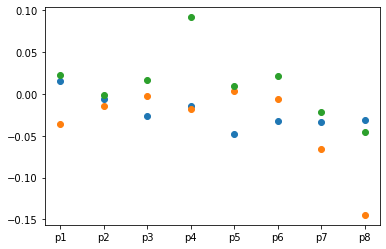

In [38]:
keys=['p1','p2','p3','p4','p5','p6','p7','p8']

plt.scatter(keys,[np.average(output['U (m s^-1)'].loc[i]) for i in keys])
plt.scatter(keys,[np.average(output['V (m s^-1)'].loc[i]) for i in keys])
plt.scatter(keys,[np.average(output['W (m s^-1)'].loc[i]) for i in keys])

plt.show()



In [39]:
type(output)

pandas.core.frame.DataFrame

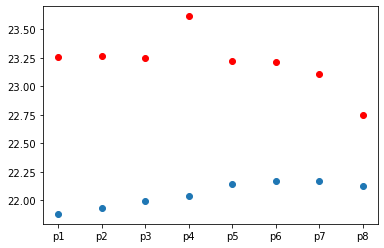

In [40]:
keys=['p1','p2','p3','p4','p5','p6','p7','p8']

plt.scatter(keys,[np.average(output['TSonic (K)'].loc[i])-273 for i in keys], color='red')
plt.scatter(keys,[np.average(output['T_HMP60 (C)'].loc[i]) for i in keys])

plt.show()

In [22]:
ysd=df_CR6.index[(df_CR6['TIMESTAMP'] == df_CR6['TIMESTAMP'].iloc[-1])].tolist()[0]
print(ysd)
print(df_CR6.index[(df_CR6['TIMESTAMP'] == df_CR6['TIMESTAMP'].iloc[8000])])

966846
Int64Index([8000], dtype='int64')


In [24]:
newdf = df_CR6.iloc[df_CR6.index[(df_CR6['TIMESTAMP'] == df_CR6['TIMESTAMP'].iloc[8000])].tolist():df_CR6.index[(df_CR6['TIMESTAMP'] == df_CR6['TIMESTAMP'].iloc[8010])].tolist()[0]]
#newdf = df_CR6.iloc[8000:8010]
print(newdf)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [[8000]] of <class 'list'>

In [ ]:
tempdf = pd.DataFrame.from_dict({(i,j): dict[i][j] 
                            for i in dict.keys() 
                            for j in dict[i].keys()},
                            orient='index')

tempdf.index = pd.MultiIndex.from_tuples(tempdf.index)

In [ ]:
type(tempdf)

In [ ]:
output.to_csv(index=False)

In [ ]:
arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]
pd.MultiIndex.from_arrays(arrays, names=('number', 'color'))

In [50]:
df_CR6_trim= df_CR6.iloc[df_CR6.index[(df_CR6['TIMESTAMP'] == df_pos['TIMESTAMP'].iloc[0].round('100ms'))].tolist()[0]:
                         df_CR6.index[(df_CR6['TIMESTAMP'] == df_pos['TIMESTAMP'].iloc[-1].round('100ms'))].tolist()[0]]


In [49]:
(df_CR6['TIMESTAMP'] == df_pos['TIMESTAMP'].iloc[0].round('100ms'))

0         False
1         False
2         False
3         False
4         False
          ...  
966842    False
966843    False
966844    False
966845    False
966846    False
Name: TIMESTAMP, Length: 966847, dtype: bool